In [2]:
# Function to compute the standard error according to Kott, 2001 (Eq.1)
# (http://www.jos.nu/articles/abstract.asp?article=174521)
def JK_STDERR(x, R=5):
    meanx = np.mean(x)
    meanx_xi= np.zeros(R)
    for i in range(R):
        meanx_xi[i] = (meanx - x[i])**2
    sum_meanx_xi = np.sum(meanx_xi)
    var = (4./5.) * sum_meanx_xi
    stderr = np.sqrt(var)
    return stderr

def tryint(s):
    try:
        return int(s)
    except:
        return s

def alphanum_key(s):
    """ Turn a string into a list of string and number chunks.
        "z23a" -> ["z", 23, "a"]
    """
    return [ tryint(c) for c in re.split('([0-9]+)', s) ]

In [3]:
from scipy.io.idl import readsav 
import scipy.io as io
import fnmatch
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
import re
%matplotlib inline


In [4]:
ms_path = '/Users/thbrown/PhD/environment/stacks/Y07/ms/sat_II/mhalo/'
ssfr_path = '/Users/thbrown/PhD/environment/stacks/Y07/ssfr/sat_II/mhalo/'
mustar_path = '/Users/thbrown/PhD/environment/stacks/Y07/mu_star/sat_II/'

In [5]:
folders = ['mh_10_12_sat', 'mh_12_13_sat', 'mh_13_14_sat', 'mh_14_15_sat']

# init gf, ms, error, cnt and detflag arrays
gf_ms = [[] for i in range(len(folders))]
err_ms = [[] for i in range(len(folders))]

gf_ssfr = [[] for i in range(len(folders))]
err_ssfr = [[] for i in range(len(folders))]

gf_mustar = [[] for i in range(len(folders))]
err_mustar = [[] for i in range(len(folders))]

# quantities tracked in each stacking bin
cnt_ms = [[] for i in range(len(folders))]
cnt_ssfr = [[] for i in range(len(folders))]
cnt_mustar = [[] for i in range(len(folders))]

ms_mean = [[] for i in range(len(folders))]
ssfr_mean = [[] for i in range(len(folders))]
mustar_mean = [[] for i in range(len(folders))]


### - stellar mass
# recursively step through stacks and extract 
for i in range(len(folders)):
    # find dict.p in folder(s)
    matches = []
    for file in os.listdir(ms_path+folders[i]):
        if file.endswith('.sav'):matches.append(os.path.join(ms_path+folders[i], file))

    matches = sorted(matches)
    # write information to lists for plotting
    for match in matches:
        
        mhead, mtail = os.path.split(match)
        
        # Load the idl structures from file.
        s = readsav(match)
        
        
        gf_ms[i].append(s.stack.GF[0][0][0]) # stacked gas fraction
        
        try: # an exception must be made for bins where jackknife is not possible
            err_ms[i].append(JK_STDERR(np.log10(s.stack.RESAMP_GF[0]), 5)) # error on gf
        except AttributeError:
            print("No error analysis run on " + mtail)
            print("because there's only", s.stack.NUSED[0][0],"gals in bin.")
            print("")
        
        ms_mean[i].append(s.stack.MEAN_X[0])# mean "x-axis"
        cnt_ms[i].append(s.stack.NUSED[0][0]) # number of galaxies in bin

### - sSFR     
# recursively step through stacks and extract 
for i in range(len(folders)):
    # find dict.p in folder(s)
    matches = []
    for file in os.listdir(ssfr_path+folders[i]):
        if file.endswith('.sav'):matches.append(os.path.join(ssfr_path+folders[i], file))

    matches = sorted(matches)
    # write information to lists for plotting
    for match in matches:
        
        mhead, mtail = os.path.split(match)
        
        # Load the idl structures from file.
        s = readsav(match)
        
        gf_ssfr[i].append(s.stack.GF[0][0][0]) # stacked gas fraction
        
        try: # an exception must be made for bins where jackknife is not possible
            err_ssfr[i].append(JK_STDERR(np.log10(s.stack.RESAMP_GF[0]), 5)) # error on gf
        except AttributeError:
            print("No error analysis run on " + mtail)
            print("because there's only", s.stack.NUSED[0][0],"gals in bin.")
            print("")
        
        ssfr_mean[i].append(s.stack.MEAN_X[0])# mean "x-axis"
        cnt_ssfr[i].append(s.stack.NUSED[0][0]) # number of galaxies in bin

### --- stellar surface density
# recursively step through stacks and extract 
for i in range(len(folders)):
    # find dict.p in folder(s)
    matches = []
    for file in os.listdir(mustar_path+folders[i]):
        if file.endswith('.sav'):matches.append(os.path.join(mustar_path+folders[i], file))

    matches = sorted(matches)
    # write information to lists for plotting
    for match in matches:
        
        mhead, mtail = os.path.split(match)
        
        # Load the idl structures from file.
        s = readsav(match)
        
        gf_mustar[i].append(s.stack.GF[0][0][0]) # stacked gas fraction
        
        try: # an exception must be made for bins where jackknife is not possible
            err_mustar[i].append(JK_STDERR(np.log10(s.stack.RESAMP_GF[0]), 5)) # error on gf
        except AttributeError:
            print("No error analysis run on " + mtail)
            print("because there's only", s.stack.NUSED[0][0],"gals in bin.")
            print("")
        
        mustar_mean[i].append(s.stack.MEAN_X[0])# mean "x-axis"
        cnt_mustar[i].append(s.stack.NUSED[0][0]) # number of galaxies in bin


No error analysis run on mh_10_12_sat_bin_4.sav
because there's only 5 gals in bin.

No error analysis run on mh_12_13_sat_bin_5.sav
because there's only 9 gals in bin.



In [6]:
print(np.log10(gf_mustar[1]))


[ 0.44494134  0.12855154 -0.1787989  -0.5689847  -0.80625033]


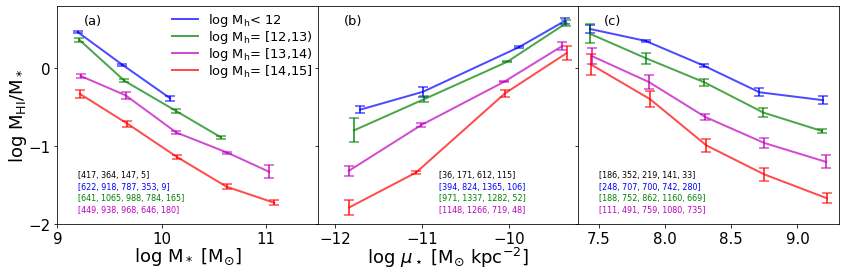

In [13]:
fig, ax = plt.subplots(1,3, sharey=True, sharex=False, figsize=[14,4])
rcParams.update({'font.size': 15})
fig.subplots_adjust(hspace=0, wspace=0)

ax[0].set_ylabel(r'log M$_{\rm HI}/$M$_*$', size=18, labelpad=-1)
ax[0].set_xlabel(r'log M$_*$ [M$_{\odot}$]', size=18, labelpad=-1)
ax[1].set_xlabel(r'log sSFR [yr$^{-1}$]', size=18, labelpad=-1)
ax[1].set_xlabel(r'log $\mu_\star$ [M$_{\odot}$ kpc$^{-2}$]', size=18, labelpad=-1)
ax[0].set_ylim(-2,0.8)
ax[0].set_xlim(9,11.5)
ax[1].set_xlim(-12.2,-9.2)
ax[0].set_yticks([-2,-1,0])
ax[0].set_xticks([9,10,11])
ax[1].set_xticks([-12,-11,-10])


# stellar mass
ax[0].plot(ms_mean[0][0:3], np.log10(gf_ms[0][0:3]), '-b', linewidth=2, alpha=0.7,
             label=r'log M$_{\rm h}$< 12')
ax[0].errorbar(ms_mean[0][0:3], np.log10(gf_ms[0][0:3]), yerr=err_ms[0][0:3],
               fmt='', linestyle='', ms=10, ecolor='b', elinewidth=2, capsize=5, capthick=1.5, alpha=0.7)

ax[0].plot(ms_mean[1][0:4], np.log10(gf_ms[1][0:4]), '-g', linewidth=2, alpha=0.7,
             label=r'log M$_{\rm h}$= [12,13)')
ax[0].errorbar(ms_mean[1][0:4], np.log10(gf_ms[1][0:4]), yerr=err_ms[1][0:4],
               fmt='', linestyle='', ms=10, ecolor='g', elinewidth=2, capsize=5, capthick=1.5, alpha=0.7)

ax[0].plot(ms_mean[2], np.log10(gf_ms[2]), '-m', linewidth=2, alpha=0.7,
             label=r'log M$_{\rm h}$= [13,14)')
ax[0].errorbar(ms_mean[2], np.log10(gf_ms[2]), yerr=err_ms[2],
               fmt='', linestyle='', ms=10, ecolor='m', elinewidth=2, capsize=5, capthick=1.5, alpha=0.7)

ax[0].plot(ms_mean[3], np.log10(gf_ms[3]), '-r', linewidth=2, alpha=0.7,
             label=r'log M$_{\rm h}$= [14,15]')
ax[0].errorbar(ms_mean[3], np.log10(gf_ms[3]), yerr=err_ms[3],
               fmt='', linestyle='', ms=10, ecolor='r', elinewidth=2, capsize=5, capthick=1.5, alpha=0.7)


# sSFR
ax[1].plot(ssfr_mean[0], np.log10(gf_ssfr[0]), '-b', linewidth=2, alpha=0.7,
             label=r'log M$_{\rm h}$< 12')
ax[1].errorbar(ssfr_mean[0], np.log10(gf_ssfr[0]), yerr=err_ssfr[0],
               fmt='', linestyle='', ms=10, ecolor='b', elinewidth=2, capsize=5, capthick=1.5, alpha=0.7)
ax[1].plot(ssfr_mean[1], np.log10(gf_ssfr[1]), '-g', linewidth=2, alpha=0.7,
             label=r'log M$_{\rm h}$= [12,13)')
ax[1].errorbar(ssfr_mean[1], np.log10(gf_ssfr[1]), yerr=err_ssfr[1],
               fmt='', linestyle='', ms=10, ecolor='g', elinewidth=2, capsize=5, capthick=1.5, alpha=0.7)
ax[1].plot(ssfr_mean[2], np.log10(gf_ssfr[2]), '-m', linewidth=2, alpha=0.7,
             label=r'log M$_{\rm h}$= [13,14)')
ax[1].errorbar(ssfr_mean[2], np.log10(gf_ssfr[2]), yerr=err_ssfr[2],
               fmt='', linestyle='', ms=10, ecolor='m', elinewidth=2, capsize=5, capthick=1.5, alpha=0.7)
ax[1].plot(ssfr_mean[3], np.log10(gf_ssfr[3]), '-r', linewidth=2, alpha=0.7,
             label=r'log M$_{\rm h}$= [14,15]')
ax[1].errorbar(ssfr_mean[3], np.log10(gf_ssfr[3]), yerr=err_ssfr[3],
               fmt='', linestyle='', ms=10, ecolor='r', elinewidth=2, capsize=5, capthick=1.5, alpha=0.7)

# stellar surface density
ax[2].plot(mustar_mean[0], np.log10(gf_mustar[0]), '-b', linewidth=2, alpha=0.7,
             label=r'log M$_{\rm h}$< 12')
ax[2].errorbar(mustar_mean[0], np.log10(gf_mustar[0]), yerr=err_mustar[0],
               fmt='', linestyle='', ms=10, ecolor='b', elinewidth=2, capsize=5, capthick=1.5, alpha=0.7)
ax[2].plot(mustar_mean[1], np.log10(gf_mustar[1]), '-g', linewidth=2, alpha=0.7,
             label=r'log M$_{\rm h}$= [12,13)')
ax[2].errorbar(mustar_mean[1], np.log10(gf_mustar[1]), yerr=err_mustar[1],
               fmt='', linestyle='', ms=10, ecolor='g', elinewidth=2, capsize=5, capthick=1.5, alpha=0.7)
ax[2].plot(mustar_mean[2], np.log10(gf_mustar[2]), '-m', linewidth=2, alpha=0.7,
             label=r'log M$_{\rm h}$= [13,14)')
ax[2].errorbar(mustar_mean[2], np.log10(gf_mustar[2]), yerr=err_mustar[2],
               fmt='', linestyle='', ms=10, ecolor='m', elinewidth=2, capsize=5, capthick=1.5, alpha=0.7)
ax[2].plot(mustar_mean[3], np.log10(gf_mustar[3]), '-r', linewidth=2, alpha=0.7,
             label=r'log M$_{\rm h}$= [14,15]')
ax[2].errorbar(mustar_mean[3], np.log10(gf_mustar[3]), yerr=err_mustar[3],
               fmt='', linestyle='', ms=10, ecolor='r', elinewidth=2, capsize=5, capthick=1.5, alpha=0.7)

# strcnt = [[str(j) for j in i] for i in cnt]

ax[0].legend(scatterpoints=1,
             labelspacing=0,
            loc=1,
            ncol=1,
            fontsize=13,
            frameon=False,
            #bbox_to_anchor=(1.05, 1),
            borderaxespad=0.)

ax[0].annotate('(a)',xy=(9, -2), xytext=(0.1, 0.92),textcoords='axes fraction', size=13)
ax[1].annotate('(b)',xy=(-12, -2), xytext=(0.1, 0.92),textcoords='axes fraction', size=13)
ax[2].annotate('(c)',xy=(7.5, -2), xytext=(0.1, 0.92),textcoords='axes fraction', size=13)


cnt_colour = ['k','b','g','m','r']
for i in range(len(cnt_ms)):
    ax[0].annotate('%s' % cnt_ms[i], xy=(9.2,-1.4 - (i * .15)),
                textcoords='data',color=cnt_colour[i], fontsize=8)
    ax[1].annotate('%s' % cnt_ssfr[i], xy=(-10.8,-1.4 - (i * .15)),
                textcoords='data',color=cnt_colour[i], fontsize=8)
    ax[2].annotate('%s' % cnt_mustar[i], xy=(7.5,-1.4 - (i * .15)),
                textcoords='data',color=cnt_colour[i], fontsize=8)

# plt.savefig('gf_mh_sat.png',
#             bbox_inches='tight',dpi=300)
# plt.show()

In [14]:
labels = [r'log Mh < 12: '
          , r'log Mh = [12,13): '
          , r'log Mh = [13,14): '
          , r'log Mh = [14,15]: ']

print('---------------')
print('Brown+2017, Fig 2a')
print('---------------')
print('')
print("log M* [Msol]")
print('---------------')
[print(label,", ".join(["{:.2f}"]*len(ms)).format(*ms)) for label, ms in zip(labels, ms_mean)]

print('')
print("log MHI/M*")
print('---------------')
[print(label,", ".join(["{:.2f}"]*len(gf)).format(*np.log10(gf))) for label, gf in zip(labels, gf_ms)]

print('')
print("+/-MHI/M* [dex]")
print('---------------')
[print(label,", ".join(["{:.3f}"]*len(error)).format(*error)) for label, error in zip(labels, err_ms)]

print('')
print("N")
print('---------------')
[print(label,", ".join(["{:}"]*len(count)).format(*count)) for label, count in zip(labels, cnt_ms)]


print('')
print('---------------')
print('Brown+2017, Fig 2b')
print('---------------')

print('')
print("log sSFR [Msol/yr]")
print('---------------')
[print(label,", ".join(["{:.2f}"]*len(ssfr)).format(*ssfr)) for label, ssfr in zip(labels, ssfr_mean)]

print('')
print("log MHI/M*")
print('---------------')
[print(label,", ".join(["{:.2f}"]*len(gf)).format(*np.log10(gf))) for label, gf in zip(labels, gf_ssfr)]

print('')
print("+/-MHI/M* [dex]")
print('---------------')
[print(label,", ".join(["{:.3f}"]*len(error)).format(*error)) for label, error in zip(labels, err_ssfr)]

print('')
print("N")
print('---------------')
[print(label,", ".join(["{:}"]*len(count)).format(*count)) for label, count in zip(labels, cnt_ssfr)]



print('')
print('---------------')
print('Brown+2017, Fig 2c')
print('---------------')

print('')
print("log mu* [Msol/kpc^2]")
print('---------------')
[print(label,", ".join(["{:.2f}"]*len(mustar)).format(*mustar)) for label, mustar in zip(labels, mustar_mean)]

print('')
print("log MHI/M*")
print('---------------')
[print(label,", ".join(["{:.2f}"]*len(gf)).format(*np.log10(gf))) for label, gf in zip(labels, gf_mustar)]

print('')
print("+/-MHI/M* [dex]")
print('---------------')
[print(label,", ".join(["{:.3f}"]*len(error)).format(*error)) for label, error in zip(labels, err_mustar)]

print('')
print("N")
print('---------------')
[print(label,", ".join(["{:}"]*len(count)).format(*count)) for label, count in zip(labels, cnt_mustar)]




---------------
Brown+2017, Fig 2a
---------------

log M* [Msol]
---------------
log Mh < 12:  9.20, 9.62, 10.08, 10.51
log Mh = [12,13):  9.21, 9.64, 10.14, 10.57, 10.94
log Mh = [13,14):  9.22, 9.65, 10.14, 10.63, 11.03
log Mh = [14,15]:  9.22, 9.67, 10.15, 10.62, 11.08

log MHI/M*
---------------
log Mh < 12:  0.47, 0.05, -0.39, -0.85
log Mh = [12,13):  0.37, -0.16, -0.55, -0.89, -1.14
log Mh = [13,14):  -0.10, -0.35, -0.83, -1.08, -1.33
log Mh = [14,15]:  -0.33, -0.71, -1.14, -1.52, -1.73

+/-MHI/M* [dex]
---------------
log Mh < 12:  0.014, 0.013, 0.035
log Mh = [12,13):  0.025, 0.019, 0.023, 0.021
log Mh = [13,14):  0.021, 0.041, 0.017, 0.012, 0.082
log Mh = [14,15]:  0.050, 0.040, 0.029, 0.035, 0.034

N
---------------
log Mh < 12:  417, 364, 147, 5
log Mh = [12,13):  622, 918, 787, 353, 9
log Mh = [13,14):  641, 1065, 988, 784, 165
log Mh = [14,15]:  449, 938, 968, 646, 180

---------------
Brown+2017, Fig 2b
---------------

log sSFR [Msol/yr]
---------------
log Mh < 12:  -1

[None, None, None, None]